In [10]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [118]:
# from google.colab import drive
import numpy as np
#from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import time
#import statistics
import pandas as pd
import sqlite3
import os.path
import seaborn as sns; sns.set()
import pickle

In [12]:
fn = "chessDB.db"

In [13]:
conn = sqlite3.connect(fn)
c = conn.cursor()

In [14]:
user_date_df = pd.read_sql_query("SELECT users.uid, min(user_events.date) FROM users INNER JOIN user_events ON users.uid = user_events.user_id GROUP BY users.uid;", conn)

In [15]:
user_date_max = pd.read_sql_query("SELECT users.uid, max(user_events.date) FROM users INNER JOIN user_events ON users.uid = user_events.user_id GROUP BY users.uid;", conn)

In [16]:
user_date_df.head(20)['min(user_events.date)'], user_date_max.head(20)['max(user_events.date)']

(0     1992-02-02
 1     1991-11-24
 2     2017-05-20
 3     1994-11-20
 4     1992-09-12
 5     1999-08-18
 6     1993-02-23
 7     1991-11-10
 8     1995-07-15
 9     2008-04-26
 10    1995-12-17
 11    1991-12-01
 12    1991-11-17
 13    1991-11-10
 14    1993-05-09
 15    2000-03-12
 16    2018-04-21
 17    1995-05-21
 18    2000-08-13
 19    1996-12-22
 Name: min(user_events.date), dtype: object, 0     2018-12-01
 1     2018-12-29
 2     2017-05-20
 3     1995-09-10
 4     2012-01-14
 5     2015-04-13
 6     1993-02-23
 7     2015-11-08
 8     1998-03-07
 9     2011-05-07
 10    1995-12-17
 11    1997-06-15
 12    2003-12-02
 13    2016-10-04
 14    1994-08-24
 15    2006-04-30
 16    2018-09-30
 17    1995-05-21
 18    2000-08-13
 19    1996-12-22
 Name: max(user_events.date), dtype: object)

,uid,max(user_events.date)
0,12435050,2018-12-01
1,12435066,2018-12-29
2,12435088,2017-05-20
3,12435092,1995-09-10
4,12435105,2012-01-14
5,12435108,2015-04-13
6,12435118,1993-02-23
7,12435133,2015-11-08
8,12435144,1998-03-07
9,12435145,2011-05-07


In [17]:
len(user_date_df)

290434

In [18]:
male_date_df = pd.read_sql_query("SELECT users.uid, min(user_events.date) FROM users INNER JOIN user_events ON users.uid = user_events.user_id WHERE users.gender = 'M' GROUP BY users.uid;", conn)

In [19]:
len(male_date_df)

234227

In [20]:
female_date_df = pd.read_sql_query("SELECT users.uid, min(user_events.date) FROM users INNER JOIN user_events ON users.uid = user_events.user_id WHERE users.gender = 'F' GROUP BY users.uid;", conn)

In [21]:
len(female_date_df)

30755

In [22]:
unknown_date_df = pd.read_sql_query("SELECT users.uid, min(user_events.date) FROM users INNER JOIN user_events ON users.uid = user_events.user_id WHERE users.gender = 'U' GROUP BY users.uid;", conn)

In [23]:
len(unknown_date_df)

25452

In [24]:
user_date_df.head(20)

,uid,min(user_events.date)
0,12435050,1992-02-02
1,12435066,1991-11-24
2,12435088,2017-05-20
3,12435092,1994-11-20
4,12435105,1992-09-12
5,12435108,1999-08-18
6,12435118,1993-02-23
7,12435133,1991-11-10
8,12435144,1995-07-15
9,12435145,2008-04-26


In [25]:
year_count = user_date_df.groupby('min(user_events.date)').count()
year_count_m = male_date_df.groupby('min(user_events.date)').count()
year_count_f = female_date_df.groupby('min(user_events.date)').count()
year_count_u = unknown_date_df.groupby('min(user_events.date)').count()

In [26]:
year_count.head()

,uid
min(user_events.date),
1991-01-28,10
1991-01-31,20
1991-02-18,3
1991-02-26,1
1991-03-17,65


In [27]:
year_count['cumsum'] = year_count['uid'].cumsum()
year_count_m['cumsum'] = year_count_m['uid'].cumsum()
year_count_f['cumsum'] = year_count_f['uid'].cumsum()
year_count_u['cumsum'] = year_count_u['uid'].cumsum()

In [28]:
year_count.head()

,uid,cumsum
min(user_events.date),,
1991-01-28,10,10
1991-01-31,20,30
1991-02-18,3,33
1991-02-26,1,34
1991-03-17,65,99


# Number of players who register every day

In [29]:
year_count.index = pd.to_datetime(year_count.index)
year_count_m.index = pd.to_datetime(year_count_m.index)
year_count_f.index = pd.to_datetime(year_count_f.index)
year_count_u.index = pd.to_datetime(year_count_u.index)

In [30]:
year_percents_gender = pd.DataFrame()

In [31]:
len(year_count.index), len(year_count_m.index), len(year_count_f.index), len(year_count_u.index)

(6530, 6470, 2647, 3322)

In [32]:
year_count_y = year_count.asfreq(freq='Y', method='pad')
year_count_m_y = year_count_m.asfreq(freq='Y', method='pad')
year_count_f_y = year_count_f.asfreq(freq='Y', method='pad')
year_count_u_y = year_count_u.asfreq(freq='Y', method='pad')

In [33]:
len(year_count_y), len(year_count_m_y), len(year_count_f_y), len(year_count_u_y)

(28, 28, 28, 25)

In [34]:
year_percents_gender['m_percent'] = [m / a for m, a in zip(year_count_m_y['cumsum'], year_count_y['cumsum'])]
year_percents_gender['f_percent'] = [m / a for m, a in zip(year_count_f_y['cumsum'], year_count_y['cumsum'])]
#year_percents_gender['u_percent'] = [m / a for m, a in zip(year_count_u_y['cumsum'], year_count_y['cumsum'])]
year_percents_gender['u_percent'] = [1 - x - y for x, y in zip(year_percents_gender['m_percent'], year_percents_gender['f_percent'])]

In [35]:
year_percents_gender.index = year_count_y.index

In [36]:
year_count[-100:]

,uid,cumsum
min(user_events.date),,
2018-03-10,1,290301
2018-03-29,1,290302
2018-03-30,1,290303
2018-03-31,1,290304
2018-04-05,1,290305
2018-04-07,1,290306
2018-04-08,1,290307
2018-04-10,1,290308
2018-04-13,1,290309


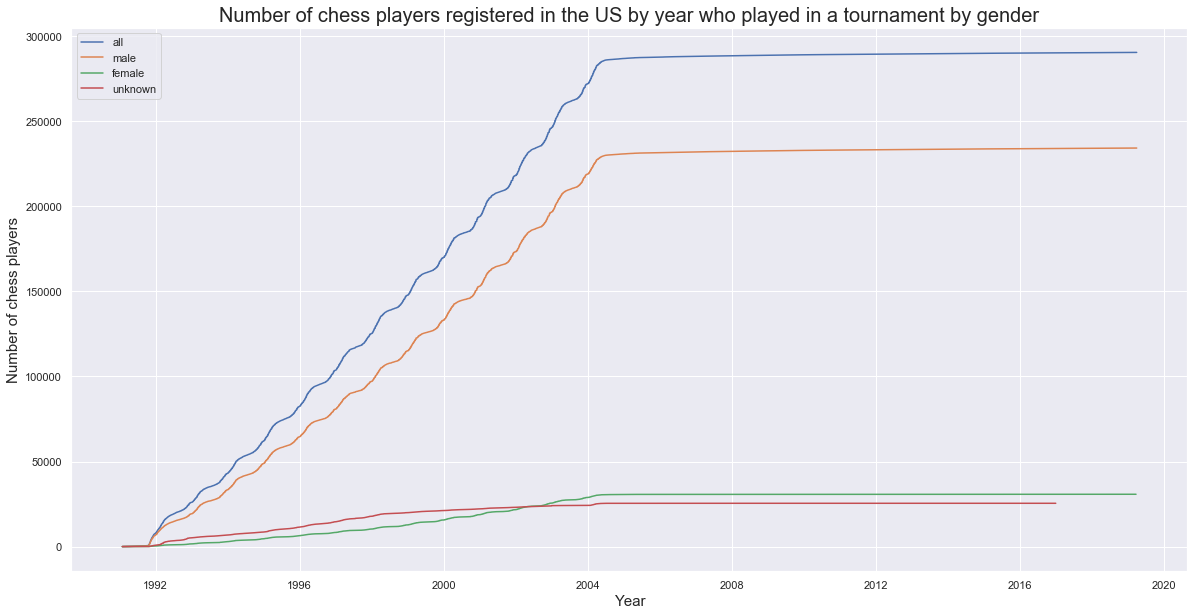

In [46]:
plt.figure(figsize=(20, 10))
plt.plot(year_count.index, year_count['cumsum'].values, label="all")
plt.plot(year_count_m.index, year_count_m['cumsum'].values, label="male")
plt.plot(year_count_f.index, year_count_f['cumsum'].values, label="female")
plt.plot(year_count_u.index, year_count_u['cumsum'].values, label="unknown")
plt.title("Number of chess players registered in the US by year who played in a tournament by gender", fontsize=20)
plt.xlabel("Year", fontsize=15)
plt.ylabel("Number of chess players", fontsize=15)
plt.legend()
plt.savefig('number_of_chess_players.jpg')

In [39]:
x = year_percents_gender.index
#y = np.vstack([year_percents_gender['m_percent'], year_percents_gender['f_percent'], year_percents_gender['u_percent']])
labels = ["male_percent", "female_percent", "unknown_percent"]
colors = ["sandybrown", "tomato", "skyblue"]

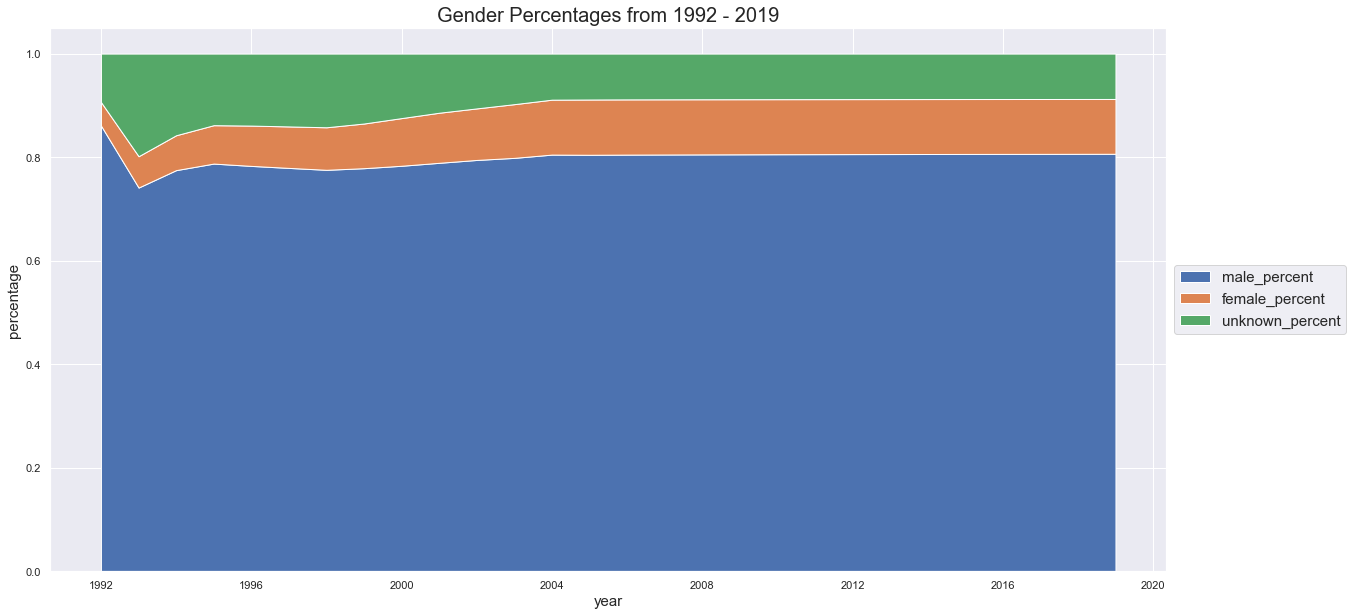

In [43]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.stackplot(x, year_percents_gender['m_percent'], year_percents_gender['f_percent'], year_percents_gender['u_percent'], labels=labels)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=15)
plt.title("Gender Percentages from 1992 - 2019", fontsize=20)
plt.xlabel("year", fontsize=15)
plt.ylabel("percentage", fontsize=15)
plt.savefig('gender_ratios.jpg')

Slope from 1992 to 2004 and 2004 to 2019. The graph looks a bit suspect: is this real or some inconsistencies on my end or the websites/database end. It will have to do for now, because the answer may take some time. I may investigate more later.

In [47]:
year_count.index[110], year_count.index[4500]

(Timestamp('1992-01-04 00:00:00'), Timestamp('2004-04-02 00:00:00'))

In [48]:
len(year_count)

6530

In [49]:
slope1 = (year_count['cumsum'].values[4500] - year_count['cumsum'].values[110]) / (4500 - 110)
slope1

62.515034168564924

In [50]:
slope2 = (year_count['cumsum'].values[6529] - year_count['cumsum'].values[4500]) / (6529 - 4500)
slope2

3.9310004928536224

From 1992 to 2004, we see about 63 people new people registering and playing in a tournament every year. This has droped significantly down to 4 from 2004 - present

# Average rating and standard deviation by year

In [51]:
ratings_df = pd.read_sql_query("SELECT date, user_events.reg_after, users.uid FROM users INNER JOIN user_events ON users.uid = user_events.user_id;", conn)

In [108]:
ratings_df.head()

,date,reg_after,uid
0,1996-08-25,1385 (P5),12683802
1,1994-12-10,735 (P8),12632612
2,1994-11-06,711 (P4),12632612
3,2001-02-10,576 (P5),12831758
4,1993-04-15,None,12582004


In [109]:
ratings_date_df = pd.DataFrame()

Rows are dates (one date column), columns is the rating for each uid (300k uid columns)

In [110]:
dates = list(sorted(set(ratings_df['date'])))

In [111]:
len(dates)

10057

In [112]:
dates[0], dates[-2]

('1991-01-28', '2019-04-09')

In [113]:
ratings_date_df['dates'] = dates

In [114]:
ratings_date_df.head()

,dates
0,1991-01-28
1,1991-01-31
2,1991-02-18
3,1991-02-26
4,1991-03-17


In [115]:
len(ratings_df)

3283074

Let's just keep track of rating by year, and the latest rating for that year

In [26]:
uid_date_d = {}
start = time.time()
for index, row in ratings_df.iterrows():
    if index % 100000 == 0:
        print(index)
    if not row.uid in uid_date_d.keys():
        uid_date_d[row.uid] = {}
    year = row.date[:4]
    #uid_date_d[row.uid][row.date] = row.reg_after
    # get rid of provisional part
    uid_date_d[row.uid][year] = int(row.reg_after.split(" ")[0]) if row.reg_after else None
end = time.time()
print(end - start, " seconds")

0
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
1300000
1400000
1500000
1600000
1700000
1800000
1900000
2000000
2100000
2200000
2300000
2400000
2500000
2600000
2700000
2800000
2900000
3000000
3100000
3200000
950.0583763122559  seconds


In [36]:
len(list(uid_date_d.keys()))

290434

In [37]:
uid_date_d[12683802]

{'1996': 1385,
 '1991': 'NA',
 '1992': 'NA',
 '1993': 'NA',
 '1994': 'NA',
 '1995': 'NA',
 '1997': 1385,
 '1998': 1385,
 '1999': 1385,
 '2000': 1385,
 '2001': 1385,
 '2002': 1385,
 '2003': 1385,
 '2004': 1385,
 '2005': 1385,
 '2006': 1385,
 '2007': 1385,
 '2008': 1385,
 '2009': 1385,
 '2010': 1385,
 '2011': 1385,
 '2012': 1385,
 '2013': 1385,
 '2014': 1385,
 '2015': 1385,
 '2016': 1385,
 '2017': 1385,
 '2018': 1385,
 '2019': 1385}

In [38]:
#uid_date_d[12683802]['1996'].split(" ")[0]
int("1385")

1385

In [39]:
"1385".split(" ")[0]

'1385'

In [40]:
uid_set = set(ratings_df['uid'])

In [41]:
uids = list(uid_set)

In [42]:
len(uids)

290434

In [116]:
# years: 1991 - 2019
years = [str(x) for x in range(1991, 2020)]
years

['1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019']

In [44]:
for num, uid in enumerate(uids):
    for index, year in enumerate(years):
        if year not in uid_date_d[uid]:
            try:
                uid_date_d[uid][year] = uid_date_d[uid][years[index - 1]]
            except:
                uid_date_d[uid][year] = "NA"
        elif uid_date_d[uid][year] == None:
            try:
                uid_date_d[uid][year] = uid_date_d[uid][years[index - 1]]
            except:
                uid_date_d[uid][year] = "NA"

In [45]:
pickle.dump(uid_date_d, open( "uid_date_d.pickle", "wb" ))

In [119]:
uid_date_d = pickle.load( open( "uid_date_d.pickle", "rb" ) )

In [46]:
df = pd.DataFrame(index=years)
start = time.time()
for num, uid in enumerate(uids):
    if num % 10000 == 0:
        print(num)
    u = []
    for year in years:
        u.append(uid_date_d[uid][year])
    df[uid] = u
end = time.time()
print(end - start, "seconds")

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
6132.803323030472 seconds


In [47]:
df.mean(axis=1)

1991    1469.460505
1992    1469.567591
1993    1476.286349
1994    1479.513102
1995    1478.230063
1996    1475.899347
1997    1471.365812
1998    1465.221455
1999    1457.432788
2000    1450.476871
2001    1443.122789
2002    1440.520764
2003    1436.994135
2004    1437.610538
2005    1445.361082
2006    1451.171223
2007    1455.811560
2008    1460.367420
2009    1464.976540
2010    1469.812222
2011    1473.800965
2012    1478.176615
2013    1481.488033
2014    1484.912118
2015    1487.496926
2016    1489.286444
2017    1491.377069
2018    1492.500993
2019    1494.856873
dtype: float64

In [48]:
df_aggs = df.copy(deep=True)
df_aggs['mean'] = df.mean(axis=1)
df_aggs['std'] = df.std(axis=1)

In [49]:
df_aggs.head()

,12582912,12582913,12582914,12582916,12582917,12582918,12582919,12582920,12582921,12582922,...,12582904,12582905,12582906,12582907,12582908,12582909,12582910,12582911,mean,std
1991,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,1469.460505,404.693575
1992,1451,2356,NA,1125,1535,1203,1237,1522,882,792,...,417,619,1528,1377,1765,1056,870,607,1469.567591,401.143367
1993,1434,2259,1213,1125,1535,1203,1237,1574,882,792,...,545,619,1501,1291,1355,756,1017,607,1476.286349,399.984928
1994,1485,2259,1125,1125,1535,1203,1237,1574,882,792,...,618,619,1477,1646,1355,756,1017,607,1479.513102,400.431339
1995,1485,2259,1125,1192,1535,1203,1237,1574,882,792,...,618,619,1481,1760,1355,781,1017,607,1478.230063,401.704975


Text(0, 0.5, 'Average rating')

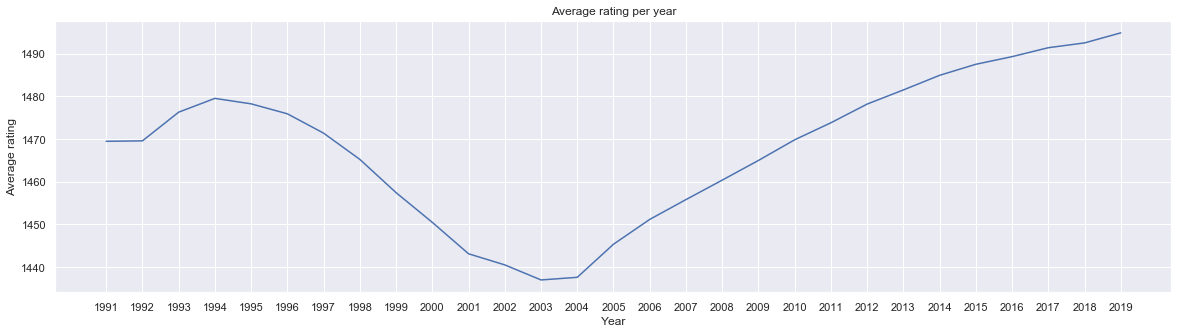

In [50]:
plt.figure(figsize=(20, 5))
plt.plot(df_aggs.index, df_aggs['mean'].values)
plt.title("Average rating per year")
plt.xlabel("Year")
plt.ylabel("Average rating")

The rating average appears to peak around 1994, dip down near 2003 and has been on the increase ever since.

In [143]:
df_aggs.to_csv("df_aggs.csv")

In [96]:
df.to_pickle("df_aggs.pkl")

In [272]:
df_aggs = pickle.load(open("df_aggs.pkl","rb"))

In [273]:
df_aggs.replace("NA", float('nan'), inplace=True)

In [274]:
df_aggs.head()

,12582912,12582913,12582914,12582916,12582917,12582918,12582919,12582920,12582921,12582922,...,12582902,12582903,12582904,12582905,12582906,12582907,12582908,12582909,12582910,12582911
1991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992,1451.0,2356.0,NaN,1125.0,1535.0,1203.0,1237.0,1522.0,882.0,792.0,...,356.0,843.0,417.0,619.0,1528.0,1377.0,1765.0,1056.0,870.0,607.0
1993,1434.0,2259.0,1213.0,1125.0,1535.0,1203.0,1237.0,1574.0,882.0,792.0,...,481.0,650.0,545.0,619.0,1501.0,1291.0,1355.0,756.0,1017.0,607.0
1994,1485.0,2259.0,1125.0,1125.0,1535.0,1203.0,1237.0,1574.0,882.0,792.0,...,481.0,650.0,618.0,619.0,1477.0,1646.0,1355.0,756.0,1017.0,607.0
1995,1485.0,2259.0,1125.0,1192.0,1535.0,1203.0,1237.0,1574.0,882.0,792.0,...,481.0,650.0,618.0,619.0,1481.0,1760.0,1355.0,781.0,1017.0,607.0


In [120]:
df_aggs = pd.read_csv("df_aggs.csv", index_col=0)

In [6]:
df_original = df_aggs.copy(deep=True)

In [121]:
df_aggs = df_aggs.iloc[:, 0:-2]

In [233]:
df_aggs.head()

,12582912,12582913,12582914,12582916,12582917,12582918,12582919,12582920,12582921,12582922,...,12582902,12582903,12582904,12582905,12582906,12582907,12582908,12582909,12582910,12582911
1991,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1992,1451,2356,NA,1125,1535,1203,1237,1522,882,792,...,356,843,417,619,1528,1377,1765,1056,870,607
1993,1434,2259,1213,1125,1535,1203,1237,1574,882,792,...,481,650,545,619,1501,1291,1355,756,1017,607
1994,1485,2259,1125,1125,1535,1203,1237,1574,882,792,...,481,650,618,619,1477,1646,1355,756,1017,607
1995,1485,2259,1125,1192,1535,1203,1237,1574,882,792,...,481,650,618,619,1481,1760,1355,781,1017,607


In [275]:
df_aggs.mean(axis=1)

1991    1469.460505
1992    1286.806318
1993    1191.595125
1994    1125.614566
1995    1077.378530
1996    1037.228633
1997    1006.460670
1998     976.385157
1999     947.492651
2000     918.462384
2001     888.196273
2002     861.308821
2003     842.029773
2004     836.162595
2005     843.312802
2006     847.765835
2007     850.684329
2008     852.789474
2009     854.638472
2010     856.243988
2011     857.458140
2012     858.545612
2013     859.410848
2014     860.268129
2015     860.849392
2016     861.306603
2017     861.690709
2018     861.951350
2019     862.038904
dtype: float64

# Rating by gender per year

In [276]:
female_df = pd.read_sql_query("SELECT users.uid FROM users WHERE users.gender = 'F';", conn)

In [277]:
len(female_df)

46942

In [278]:
male_df = pd.read_sql_query("SELECT users.uid FROM users WHERE users.gender = 'M';", conn)

In [279]:
len(male_df)

401926

In [280]:
unknown_df = pd.read_sql_query("SELECT users.uid FROM users WHERE users.gender = 'U';", conn)

In [281]:
len(unknown_df)

39718

In [282]:
users_df = pd.read_sql_query("SELECT users.uid FROM users;", conn)

In [283]:
len(users_df), len(df_aggs.columns)

(488586, 290434)

In [284]:
female_uids = female_df['uid']
male_uids = male_df['uid']
unknown_uids = unknown_df['uid']
#female_uids = [str(x) for x in female_uids]
#male_uids = [str(x) for x in male_uids]
#unknown_uids = [str(x) for x in unknown_uids]

In [285]:
female_df = df_aggs[df_aggs.columns.intersection(female_uids)]
male_df = df_aggs[df_aggs.columns.intersection(male_uids)]
unknown_df = df_aggs[df_aggs.columns.intersection(unknown_uids)]

In [286]:
len(female_df.columns) + len(male_df.columns) + len(unknown_df.columns), len(df_aggs.columns)

(290434, 290434)

In [287]:
male_df_aggs = male_df.copy(deep=True)
#male_df_aggs['mean'] = male_df.mean(axis=1)
male_df_aggs_mean = male_df.mean(axis=1)
male_df_aggs_std = male_df.std(axis=1)
#male_df_aggs['std'] = male_df.std(axis=1)
#male_df_aggs['median'] = male_df.median(axis=1)
male_df_aggs_med = male_df.median(axis=1)
#male_df_aggs['max'] = male_df.max(axis=1)
male_df_aggs_max = male_df.max(axis=1)
#male_df_aggs['min'] = male_df.min(axis=1)
male_df_aggs_mode = male_df.mode(axis=1)
male_df_aggs['mean'] = male_df_aggs_mean
male_df_aggs['std'] = male_df_aggs_std
male_df_aggs['median'] = male_df_aggs_med
male_df_aggs['max'] = male_df_aggs_max
male_df_aggs['mode'] = male_df_aggs_mode

In [289]:
female_df_aggs = female_df.copy(deep=True)
female_df_aggs_mean = female_df.mean(axis=1)
female_df_aggs_std = female_df.std(axis=1)
female_df_aggs_med = female_df.median(axis=1)
female_df_aggs_max = female_df.max(axis=1)
#female_df_aggs_mode = female_df.mode(axis=1)
female_df_aggs['mean'] = female_df_aggs_mean
female_df_aggs['std'] = female_df_aggs_std
female_df_aggs['median'] = female_df_aggs_med
female_df_aggs['max'] = female_df_aggs_max
#female_df_aggs['mode'] = female_df_aggs_mode

In [291]:
unknown_df_aggs = unknown_df.copy(deep=True)
unknown_df_aggs_mean = unknown_df.mean(axis=1)
unknown_df_aggs_std = unknown_df.std(axis=1)
unknown_df_aggs_med = unknown_df.median(axis=1)
unknown_df_aggs_max = unknown_df.max(axis=1)
#unknown_df_aggs_mode = unknown_df.mode(axis=1)
unknown_df_aggs['mean'] = unknown_df_aggs_mean
unknown_df_aggs['std'] = unknown_df_aggs_std
unknown_df_aggs['median'] = unknown_df_aggs_med
unknown_df_aggs['max'] = unknown_df_aggs_max
#unknown_df_aggs['mode'] = unknown_df_aggs_mode

In [292]:
df_aggs_mean = df_aggs.mean(axis=1)
df_aggs_std = df_aggs.std(axis=1)
df_aggs_med = df_aggs.median(axis=1)
df_aggs_max = df_aggs.max(axis=1)
#df_aggs_mode = df_aggs.mode(axis=1)
df_aggs['mean'] = df_aggs_mean
df_aggs['std'] = df_aggs_std
df_aggs['median'] = df_aggs_med
df_aggs['max'] = df_aggs_max
#df_aggs['mode'] = df_aggs_mode

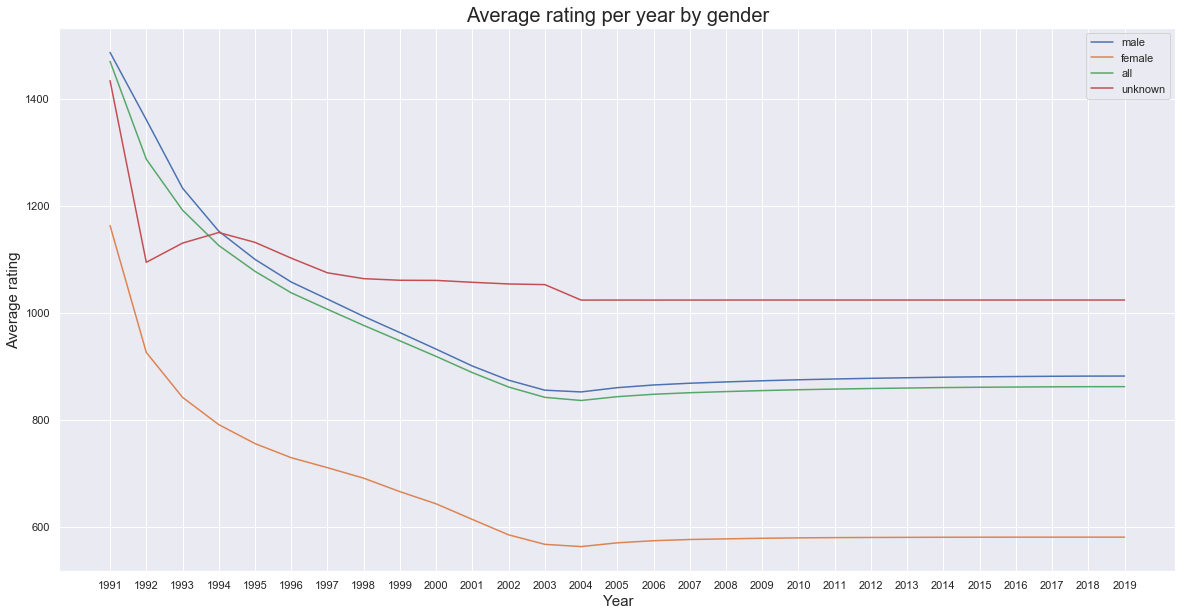

In [293]:
plt.figure(figsize=(20, 10))
plt.plot(male_df_aggs.index, male_df_aggs['mean'].values, label="male")
plt.plot(female_df_aggs.index, female_df_aggs['mean'].values, label="female")
plt.plot(df_aggs.index, df_aggs['mean'].values, label="all")
plt.plot(df_aggs.index, unknown_df_aggs['mean'].values, label="unknown")
plt.title("Average rating per year by gender", fontsize=20)
plt.xlabel("Year", fontsize=15)
plt.ylabel("Average rating", fontsize=15)
plt.legend()
plt.savefig("average_rating_per_year.jpg")

There is a significant difference between the average male and female chess ratings and the difference, about 250 remains relatively consistent over this timeframe. The average for males is about 1450 and for females is about 1200.

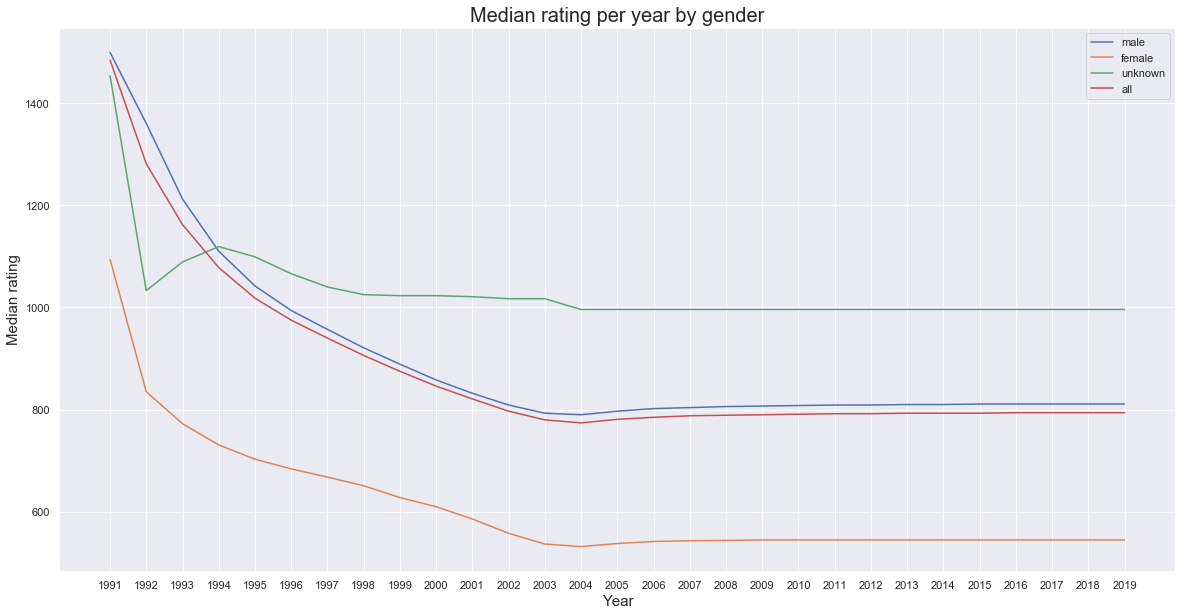

In [294]:
plt.figure(figsize=(20, 10))
plt.plot(male_df_aggs.index, male_df_aggs['median'].values, label="male")
plt.plot(female_df_aggs.index, female_df_aggs['median'].values, label="female")
plt.plot(unknown_df_aggs.index, unknown_df_aggs['median'].values, label="unknown")
plt.plot(df_aggs.index, df_aggs['median'].values, label="all")
#plt.errorbar(df_aggs.index, df_aggs['mean'].values, df_aggs['std'].values, label="average")
plt.title("Median rating per year by gender", fontsize=20)
plt.xlabel("Year", fontsize=15)
plt.ylabel("Median rating", fontsize=15)
plt.legend()
plt.savefig("Median_rating_per_year.jpg")

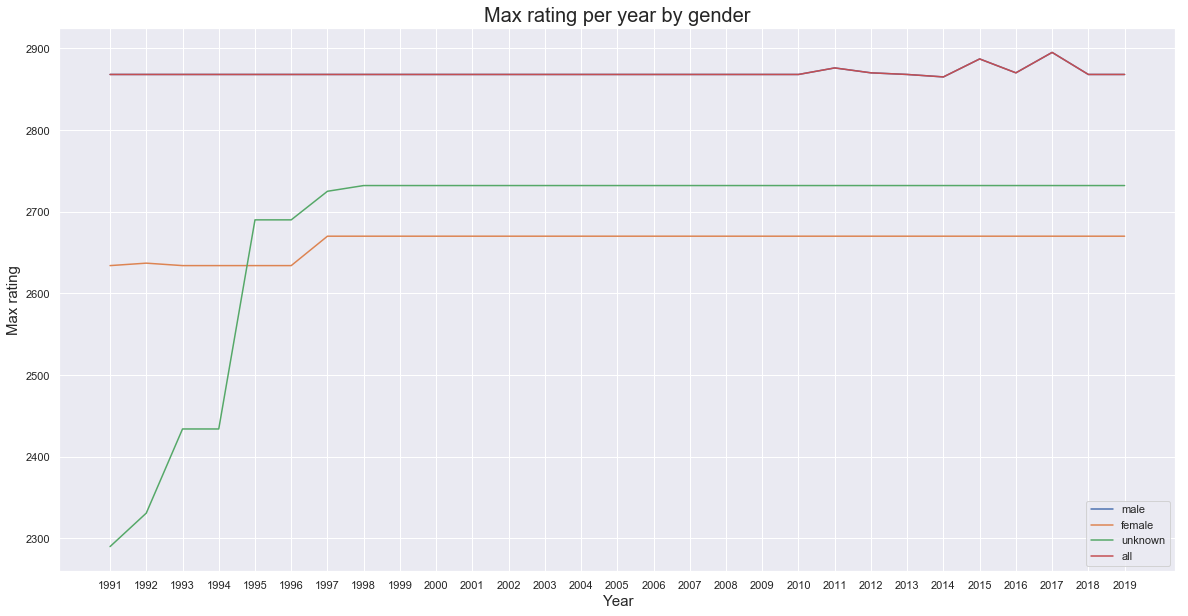

In [295]:
plt.figure(figsize=(20, 10))
plt.plot(male_df_aggs.index, male_df_aggs['max'].values, label="male")
plt.plot(female_df_aggs.index, female_df_aggs['max'].values, label="female")
plt.plot(unknown_df_aggs.index, unknown_df_aggs['max'].values, label="unknown")
plt.plot(df_aggs.index, df_aggs['max'].values, label="all")
#plt.errorbar(df_aggs.index, df_aggs['mean'].values, df_aggs['std'].values, label="average")
plt.title("Max rating per year by gender", fontsize=20)
plt.xlabel("Year", fontsize=15)
plt.ylabel("Max rating", fontsize=15)
plt.legend()
plt.savefig("Max_rating_per_year.jpg")

Now we can understand why the average and median rating has not been going up because the max hasn't either. We should also consider that rating is similar to a log scale.

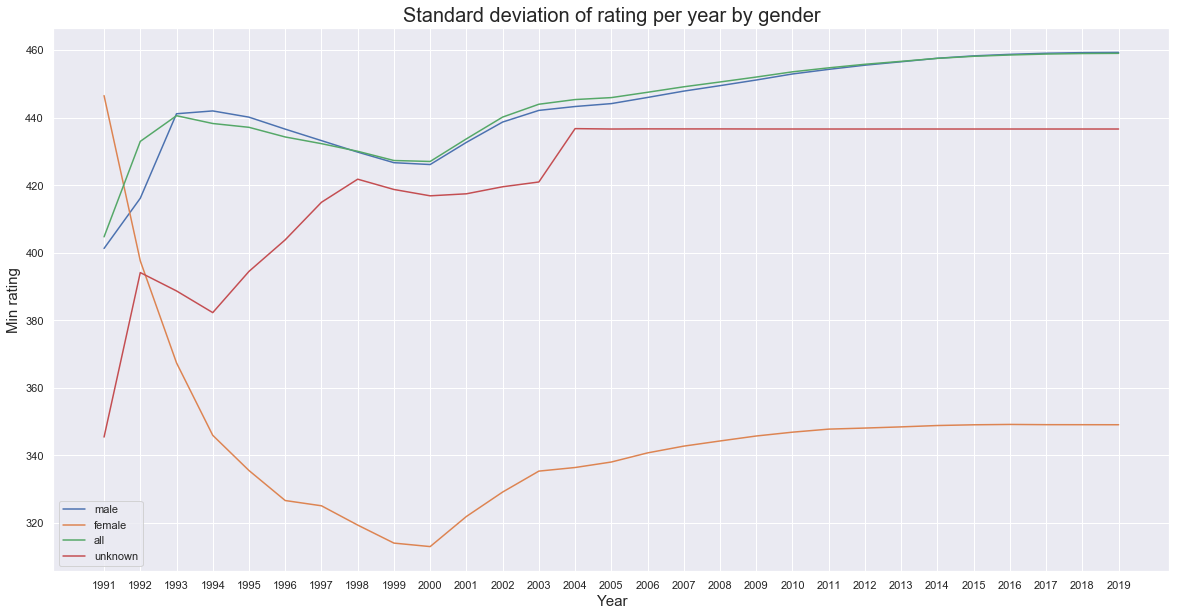

In [296]:
plt.figure(figsize=(20, 10))
plt.plot(male_df_aggs.index, male_df_aggs['std'].values, label="male")
plt.plot(female_df_aggs.index, female_df_aggs['std'].values, label="female")
plt.plot(df_aggs.index, df_aggs['std'].values, label="all")
plt.plot(unknown_df_aggs.index, unknown_df_aggs['std'].values, label="unknown")
#plt.errorbar(df_aggs.index, df_aggs['mean'].values, df_aggs['std'].values, label="average")
plt.title("Standard deviation of rating per year by gender", fontsize=20)
plt.xlabel("Year", fontsize=15)
plt.ylabel("Min rating", fontsize=15)
plt.legend()
plt.savefig("std_rating_per_year.jpg")

KeyError: 'mode'

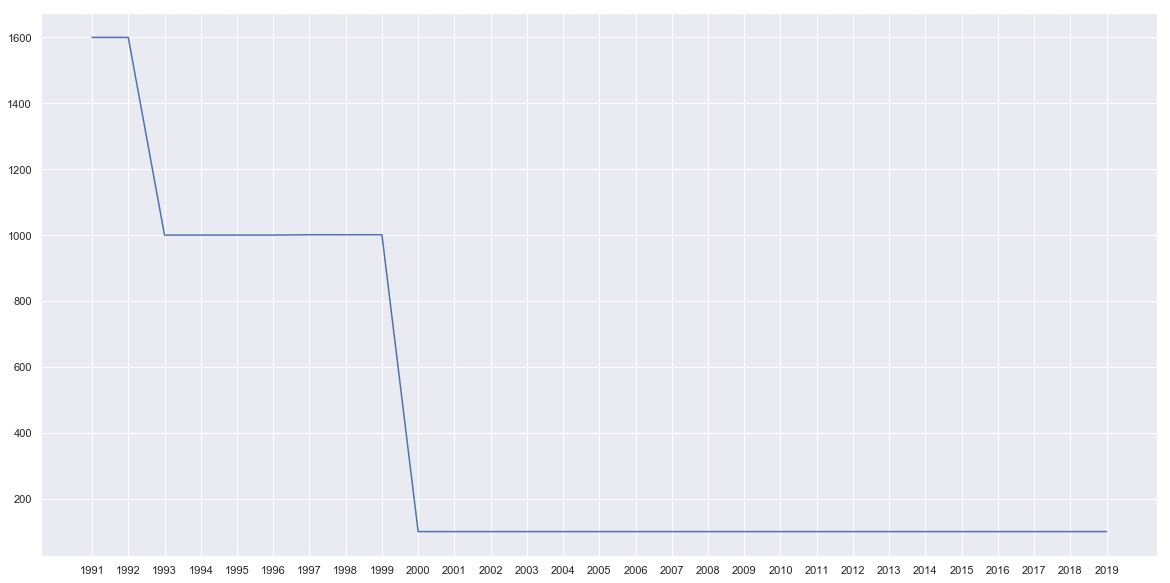

In [297]:
plt.figure(figsize=(20, 10))
plt.plot(male_df_aggs.index, male_df_aggs['mode'].values, label="male")
plt.plot(female_df_aggs.index, female_df_aggs['mode'].values, label="female")
plt.plot(df_aggs.index, df_aggs['mode'].values, label="all")
plt.plot(unknown_df_aggs.index, unknown_df_aggs['mode'].values, label="unknown")
#plt.errorbar(df_aggs.index, df_aggs['mean'].values, df_aggs['std'].values, label="average")
plt.title("Mode of rating per year by gender", fontsize=20)
plt.xlabel("Year", fontsize=15)
plt.ylabel("Min rating", fontsize=15)
plt.legend()
plt.savefig("mode_rating_per_year.jpg")

In [298]:
ratings_2019 = df_aggs.iloc[28, :]
ratings_2019.isnull().sum()

5992

In [299]:
ratings_2019_clean = ratings_2019.dropna()
ratings_2019_clean.isnull().sum()

0

C:\Users\Michael\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


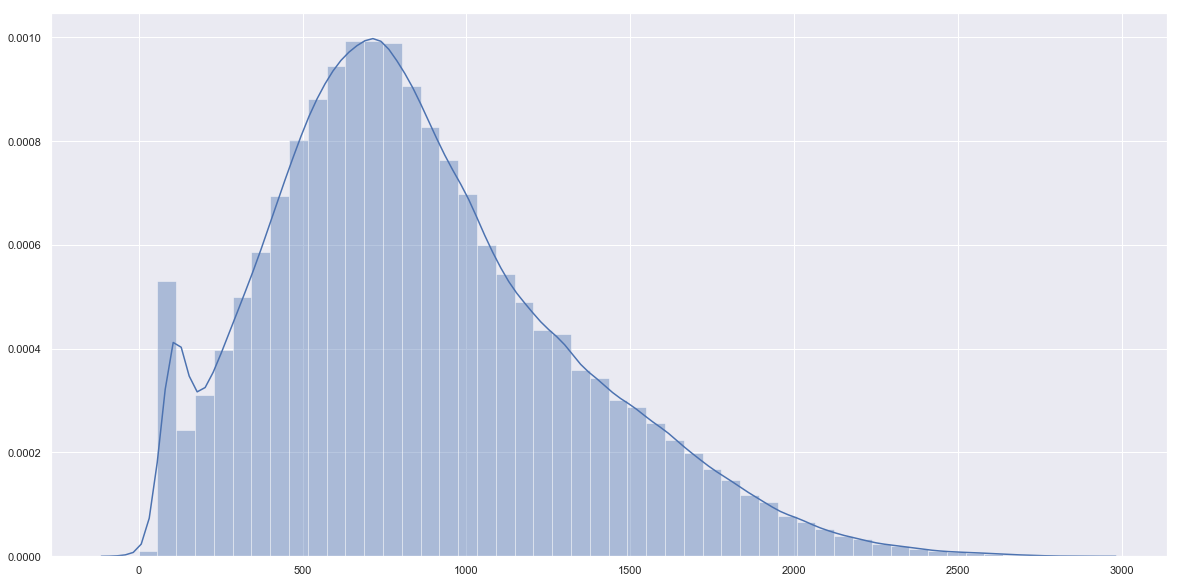

In [300]:
count = 0
ratings_list = []
for row in ratings_2019_clean:
    if row == "NA":
        count += 1
    else:
        ratings_list.append(row)
plt.figure(figsize=(20, 10))      
sns.distplot(ratings_list, label="all")
#count, len(ratings_2019_clean)

In [231]:
np.mean(ratings_list)

862.0488333260902

## df_aggs to sql

In [4]:
df_aggs = pd.read_csv("df_aggs.csv")

In [11]:
df_aggs.rename(index=str, columns={"Unnamed: 0": "date"}, inplace=True)

In [12]:
df_aggs.head()

,date,12582912,12582913,12582914,12582916,12582917,12582918,12582919,12582920,12582921,...,12582904,12582905,12582906,12582907,12582908,12582909,12582910,12582911,mean,std
0,1991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1460.779968,401.268542
1,1992,1451.0,2356.0,NaN,1125.0,1535.0,1203.0,1237.0,1522.0,882.0,...,417.0,619.0,1528.0,1377.0,1765.0,1056.0,870.0,607.0,1462.073849,397.810118
2,1993,1434.0,2259.0,1213.0,1125.0,1535.0,1203.0,1237.0,1574.0,882.0,...,545.0,619.0,1501.0,1291.0,1355.0,756.0,1017.0,607.0,1469.781914,397.131193
3,1994,1485.0,2259.0,1125.0,1125.0,1535.0,1203.0,1237.0,1574.0,882.0,...,618.0,619.0,1477.0,1646.0,1355.0,756.0,1017.0,607.0,1473.684966,397.726332
4,1995,1485.0,2259.0,1125.0,1192.0,1535.0,1203.0,1237.0,1574.0,882.0,...,618.0,619.0,1481.0,1760.0,1355.0,781.0,1017.0,607.0,1472.955166,399.040183


In [14]:
df_aggs.to_csv("dates_uids.csv")

In [45]:
ratings = [[] for _ in range(len(df_aggs['date']))]

In [46]:
for i in range(len(df_aggs['date'])):
    ratings[i] = df_aggs.iloc[i, 1:].values

In [47]:
ratings

[array([          nan,           nan,           nan, ...,           nan,
        1460.77996845,  401.26854195]),
 array([1451.        , 2356.        ,           nan, ...,  607.        ,
        1462.07384857,  397.81011759]),
 array([1434.        , 2259.        , 1213.        , ...,  607.        ,
        1469.78191437,  397.13119251]),
 array([1485.        , 2259.        , 1125.        , ...,  607.        ,
        1473.6849663 ,  397.72633198]),
 array([1485.        , 2259.        , 1125.        , ...,  607.        ,
        1472.95516569,  399.04018256]),
 array([1485.        , 2259.        , 1211.        , ...,  607.        ,
        1471.15156811,  400.25859023]),
 array([1485.        , 2259.        , 1235.        , ...,  607.        ,
        1467.1391498 ,  401.63868689]),
 array([1485.        , 2259.        , 1251.        , ...,  607.        ,
        1461.41577372,  402.55863253]),
 array([1485.        , 2259.        , 1243.        , ...,  607.        ,
        1454.13803061, 

In [48]:
uid_date_ratings = pd.DataFrame()

In [51]:
uid_date_ratings['uids'] = df_aggs.columns[1:]
for i in range(len(df_aggs['date'])):
    uid_date_ratings[df_aggs['date'][i]] = ratings[i]

In [52]:
uid_date_ratings.head()

,uids,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,12582912,NaN,1451.0,1434.0,1485.0,1485.0,1485.0,1485.0,1485.0,1485.0,...,1485.0,1485.0,1485.0,1485.0,1485.0,1485.0,1485.0,1485.0,1485.0,1485.0
1,12582913,NaN,2356.0,2259.0,2259.0,2259.0,2259.0,2259.0,2259.0,2259.0,...,2259.0,2259.0,2259.0,2259.0,2259.0,2259.0,2259.0,2259.0,2259.0,2259.0
2,12582914,NaN,NaN,1213.0,1125.0,1125.0,1211.0,1235.0,1251.0,1243.0,...,1433.0,1427.0,1451.0,1453.0,1485.0,1414.0,1414.0,1433.0,1425.0,1425.0
3,12582916,NaN,1125.0,1125.0,1125.0,1192.0,1192.0,1192.0,1192.0,1192.0,...,1192.0,1192.0,1192.0,1192.0,1192.0,1192.0,1192.0,1192.0,1192.0,1192.0
4,12582917,NaN,1535.0,1535.0,1535.0,1535.0,1535.0,1535.0,1535.0,1535.0,...,1518.0,1518.0,1518.0,1518.0,1518.0,1518.0,1518.0,1518.0,1518.0,1518.0


In [57]:
uid_date_ratings.to_csv("uid_date_ratings.csv", index=False)

# Looking at the number of tournaments per state

In [8]:
events_df = pd.read_sql_query("SELECT state, COUNT(*) FROM events_dim GROUP BY state ORDER BY COUNT(*) DESC LIMIT 100;", conn)

In [9]:
events_df

,state,COUNT(*)
0,NY,24598
1,CA,20329
2,TX,16094
3,PA,10730
4,NJ,8560
5,OH,8320
6,AZ,7180
7,IL,6867
8,MA,6591
9,FL,6299


Looks like I messed up getting the states

In [10]:
events_df = pd.read_sql_query("SELECT * FROM events_dim;", conn)

In [21]:
len(events_df)

202409

In [19]:
states = []
for s in events_df['state']:
    adding = s.split()[-1][-2:]
    if len(s) == 2:
        states.append(s)
#     if adding == "-3":
#         print(s)
#     states.append(adding)

In [20]:
len(states)

199129

In [23]:
(len(events_df) - len(states)) / len(events_df)

0.016204813027088715

In [29]:
events_df.head()

,event_id,date,state,event_name
0,199101282140,1991-01-28,CA,MISSION OAKS WINTER ACTION
1,199101310270,1991-01-31,MA,JANUARY TOURNAMENT
2,199102182150,1991-02-18,CA,FEB CARMICHAEL TOUR
3,199102260280,1991-02-26,MA,FRAMINGHAM FEB 4 SEC SWISS
4,199103170680,1991-03-17,NY,H.C.E.S. #40


In [30]:
# events_df_cleaned = pd.DataFrame()
# events_df_cleaned['event_id'] = events_df['event_id']
# events_df_cleaned['date'] = events_df['date']
# events_df_cleaned['event_name'] = events_df['event_name']
# events_df_cleaned['state'] = events_df['state']

In [38]:
events_df_cleaned = pd.read_sql_query("SELECT * FROM events_dim WHERE length(state) = 2;", conn)

In [41]:
len(events_df_cleaned) == len(states)

True

Got the state incorrectly about 1.6% of the time, let's get rid of the incorrect ones for now, but maybe will rewrite the scraping during the summer. This happened because there is no set format for entering in the state of a tournament in the database unfortunately.

In [42]:
events_df_cleaned.to_sql('events_dim_cleaned', con=conn, if_exists='append', index=False)

# Correlation between chess players in each state and number of tournaments

In [86]:
users_state = pd.read_sql_query("SELECT COUNT(uid), state FROM users GROUP BY state ORDER BY COUNT(uid) DESC;", conn)

In [87]:
users_state.head()

,COUNT(uid),state
0,51125,CA
1,49802,NY
2,35380,TX
3,28796,IL
4,23794,FL


All users, vs. the joins in Tableau reduces the data

In [88]:
events_state = pd.read_sql_query("SELECT COUNT('event id'), state FROM events_dim_cleaned GROUP BY state ORDER BY COUNT('event id') DESC;", conn)

In [89]:
events_state.head()

,COUNT('event id'),state
0,24598,NY
1,20329,CA
2,16094,TX
3,10730,PA
4,8560,NJ


In [90]:
events_state.set_index('state')

,COUNT('event id')
state,
NY,24598
CA,20329
TX,16094
PA,10730
NJ,8560
OH,8320
AZ,7180
IL,6867
MA,6591


In [91]:
events_state.set_index('state')

,COUNT('event id')
state,
NY,24598
CA,20329
TX,16094
PA,10730
NJ,8560
OH,8320
AZ,7180
IL,6867
MA,6591


In [92]:
users_events_state = pd.merge(users_state, events_state, how='inner')

In [94]:
users_events_state.set_index('state')

,COUNT(uid),COUNT('event id')
state,,
CA,51125,20329
NY,49802,24598
TX,35380,16094
IL,28796,6867
FL,23794,6299
NJ,18729,8560
PA,17878,10730
AZ,17854,7180
OH,16111,8320


In [95]:
users_events_state = users_events_state.rename(index=str, columns={"COUNT(uid)": "uid_count", "COUNT('event id')": "event_count"})

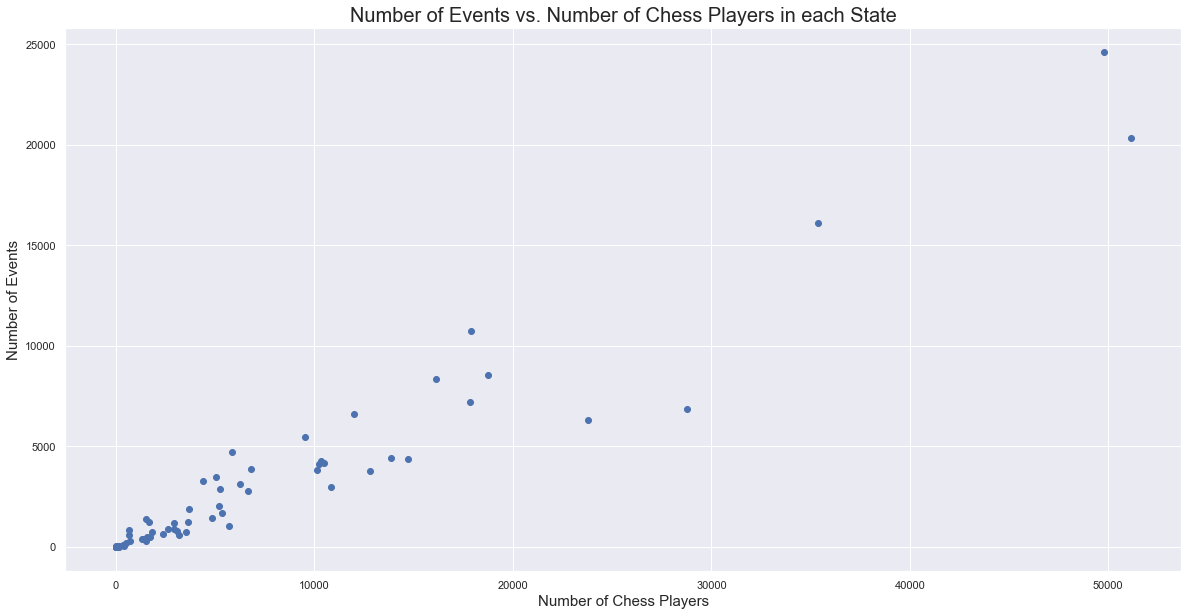

In [107]:
plt.figure(figsize=(20, 10))
#users_events_state.plot.scatter('uid_count', 'event_count')
plt.scatter(users_events_state['uid_count'], users_events_state['event_count'])
plt.title("Number of Events vs. Number of Chess Players in each State", fontsize=20)
plt.ylabel("Number of Events", fontsize=15)
plt.xlabel("Number of Chess Players", fontsize=15)
plt.savefig("events_chess_players_state.jpg")

In [38]:
users_events_state.corr()

,uid_count,event_count
uid_count,1.000000,0.961486
event_count,0.961486,1.000000


# Close Connection

In [0]:
conn.close()